# Lab 01 : MLP -- exercise

# Understanding the training loop 

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # find automatically the path of the folder containing "file_name" :
    file_name = 'mlp_exercise.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    # if previous search failed or too long, comment the previous line and simply write down manually the path below :
    #path_to_file = '/content/gdrive/My Drive/CS5242_2021_codes/codes/labs_lecture05/lab01_mlp'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [2]:
from utils import check_fashion_mnist_dataset_exists
data_path=check_fashion_mnist_dataset_exists()


FASHION-MNIST dataset missing - downloading...


39.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

54.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

74.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

83.8%IOPub

Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



100.6%


Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



73.2%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



119.3%
/home/xunwei/miniconda3/envs/deeplearn_course/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



In [3]:
train_data=torch.load(data_path+'fashion-mnist/train_data.pt')

print(train_data.size())

torch.Size([60000, 28, 28])


In [4]:
train_label=torch.load(data_path+'fashion-mnist/train_label.pt')

print(train_label.size())

torch.Size([60000])


In [5]:
test_data=torch.load(data_path+'fashion-mnist/test_data.pt')

print(test_data.size())

torch.Size([10000, 28, 28])


### Make a ONE layer net class. The network output are the scores! No softmax needed! You have only one line to write in the forward function

In [10]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear(input_size, output_size) # complete here
        
    def forward(self, x):
        scores = self.linear_layer(x)  # complete here
        return scores

### Build the net

In [11]:
net= one_layer_net(784, 10) # complete here
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=True)
)


### Choose the criterion and the optimizer: use the CHEAT SHEET to see the correct syntax. 

### Remember that the optimizer need to have access to the parameters of the network (net.parameters()).

### Set the batchize and learning rate to be:
### batchize = 50
### learning rate = 0.01







In [14]:
# make the criterion
criterion = nn.CrossEntropyLoss() # complete here

# make the SGD optimizer. 
optimizer=torch.optim.SGD(net.parameters(),lr=0.01)

# set up the batch size   
bs=50

### Complete the training loop

In [18]:
for iter in range(1,5000):
    
    # Set dL/dU, dL/dV, dL/dW to be filled with zeros
    optimizer.zero_grad()
     
    # create a minibatch
    indices = torch.LongTensor(bs).random_(0, 60000)
    minibatch_data = train_data[indices]
    minibatch_label = train_label[indices]
    
    # reshape the minibatch
    inputs = minibatch_data.reshape(bs, 784)
    
    # tell Pytorch to start tracking all operations that will be done on "inputs"
    inputs.requires_grad_()

    # forward the minibatch through the net  
    scores = net(inputs)
    
    # Compute the average of the losses of the data points in the minibatch
    loss = criterion(scores, minibatch_label)
    
    # backward pass to compute dL/dU, dL/dV and dL/dW    
    loss.backward()
    
    # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
    optimizer.step()
    

### Choose image at random from the test set and see how good/bad are the predictions

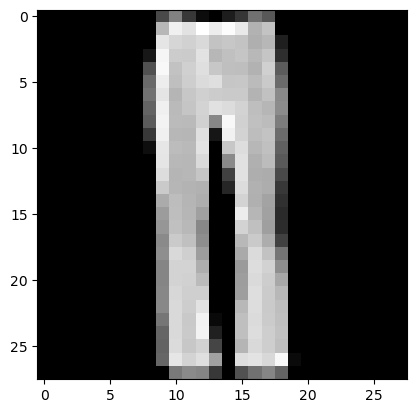

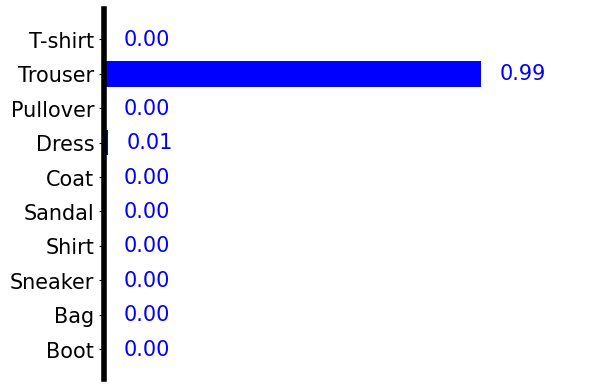

In [20]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= torch.softmax(scores, dim=1)
utils.show_prob_fashion_mnist(probs)